In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 16:52:09.360250: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:52:09.435957: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:52:09.437037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 16:52:10.494521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 2)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 4)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 8)         0

In [6]:
trainer.training_loop()

2023/08/13 16:52:14 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 16:52:14 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/60
56/56 - 7s - loss: 0.6472 - recall: 0.9328 - binary_accuracy: 0.6143 - precision: 0.6188 - false_negatives: 36.0000 - false_positives: 308.0000 - val_loss: 0.6117 - val_recall: 0.8284 - val_binary_accuracy: 0.7072 - val_precision: 0.7255 - val_false_negatives: 23.0000 - val_false_positives: 42.0000 - 7s/epoch - 125ms/step
Epoch 2/60


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 4s - loss: 0.5791 - recall: 0.8004 - binary_accuracy: 0.6973 - precision: 0.7247 - false_negatives: 107.0000 - false_positives: 163.0000 - val_loss: 0.5910 - val_recall: 0.8209 - val_binary_accuracy: 0.6847 - val_precision: 0.7051 - val_false_negatives: 24.0000 - val_false_positives: 46.0000 - 4s/epoch - 73ms/step
Epoch 3/60
56/56 - 5s - loss: 0.5537 - recall: 0.8097 - binary_accuracy: 0.7298 - precision: 0.7574 - false_negatives: 102.0000 - false_positives: 139.0000 - val_loss: 0.5662 - val_recall: 0.7761 - val_binary_accuracy: 0.7027 - val_precision: 0.7429 - val_false_negatives: 30.0000 - val_false_positives: 36.0000 - 5s/epoch - 85ms/step
Epoch 4/60
56/56 - 5s - loss: 0.5334 - recall: 0.8041 - binary_accuracy: 0.7478 - precision: 0.7822 - false_negatives: 105.0000 - false_positives: 120.0000 - val_loss: 0.5492 - val_recall: 0.7463 - val_binary_accuracy: 0.7387 - val_precision: 0.8065 - val_false_negatives: 34.0000 - val_false_positives: 24.0000 - 5s/epoch - 82ms/step
Epoch 

2023/08/13 16:57:10 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 16:57:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmph1fnxykt/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmph1fnxykt/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 2s 34ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9925373134328358, 'fp_Train_acc': 0.9652466367713004, 'fp_Train_precision': 0.9516994633273703}
Confusion matrix Train 
 [[329  27]
 [  4 532]]
56/56 [==============================] - 2s 33ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (18).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (227).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (244).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (253).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (281).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (282).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (289).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (296).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (314).jpeg

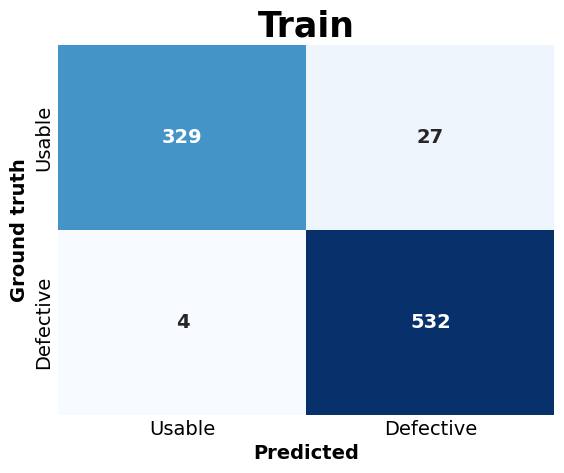

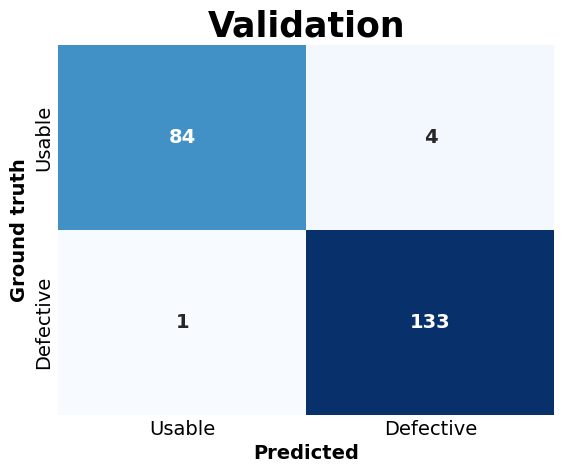

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpabt1qxjj/assets


INFO:tensorflow:Assets written to: /tmp/tmpabt1qxjj/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 16:57:29.439508: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 16:57:29.439540: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 16:57:29.439876: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpabt1qxjj
2023-08-13 16:57:29.443480: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 16:57:29.443516: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpabt1qxjj
2023-08-13 16:57:29.450706: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\x90\x0f\x00\x00\xa0\x0f\x00\x00\x84%\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xae\xef\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xf6\xf0\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\xac\x0e\x00\x00\xa4\x0e\x00\x00\x8c\x0e\x00\x00p\x0e\x00\x00`\n\x00\x00\x10\n\x00\x00\x80\x05\x00\x00P\x05\x00\x00\x00\x03\x00\x00\xd0\x02\x00\x00

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

 1/56 [..............................] - ETA: 4s

56/56 [==============================] - 2s 35ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.003478222, 'qt_std': 0.021962969, 'qt_abs_mean': 0.010053618, 'qt_abs_std': 0.019834183}


{'diff': array([-1.81080401e-03, -1.10456467e-01, -2.71696411e-03, -1.37573900e-03,
        -8.07111338e-03,  2.14410713e-04, -1.67619996e-03,  2.19501853e-02,
         1.13276467e-02, -1.30622229e-03, -4.48530423e-04,  1.14976689e-02,
        -6.95940107e-04,  2.32525766e-02,  4.37603369e-02, -4.47480939e-03,
         4.15810011e-03, -1.21957883e-02,  4.99469042e-03, -2.59408057e-02,
        -1.20474305e-02, -1.48851494e-03,  1.31045794e-03, -2.54241377e-02,
        -8.70333612e-02, -4.16722521e-03, -2.98372656e-03,  4.39172983e-03,
        -3.06243300e-02,  7.51039945e-03, -1.67718008e-02,  5.12832403e-03,
        -7.95814907e-04,  4.09097522e-02,  9.67503898e-03, -5.53500094e-03,
        -8.72519612e-03, -1.26366913e-02, -7.11013345e-05, -1.89993065e-03,
         5.20162750e-03,  1.41687412e-03, -9.15899277e-02,  2.93140532e-04,
         1.08263046e-02, -2.62940302e-04, -4.81820107e-03,  3.12718302e-02,
        -2.54133344e-03, -6.33262098e-02, -4.24772315e-03,  7.75027275e-03,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9925373134328358, 'qt_Train_acc': 0.9652466367713004, 'qt_Train_precision': 0.9516994633273703}
Confusion matrix Train 
 [[329  27]
 [  4 532]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (18).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (227).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (244).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (253).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (281).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (282).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (289).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (296).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (314).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (325).jpeg', '../dataset/resize_128/train/0_utilizavel/

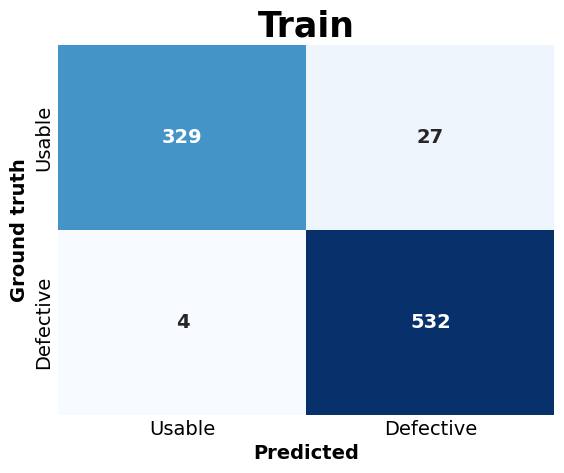

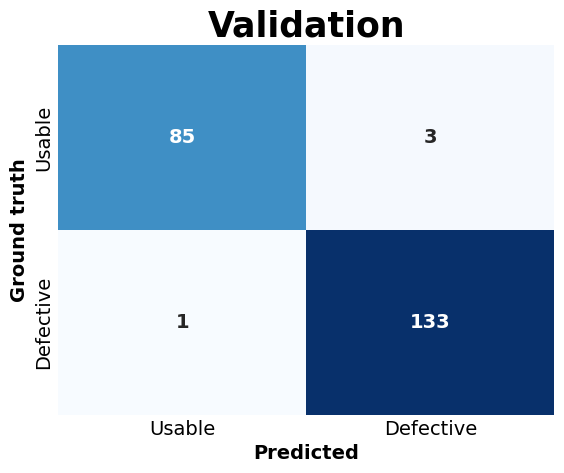

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 31ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9636363636363636, 'fp_Test_acc': 0.9562841530054644, 'fp_Test_precision': 0.9636363636363636}
Confusion matrix Test 
 [[ 69   4]
 [  4 106]]
12/12 [==============================] - 0s 32ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (453).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (472).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (483).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


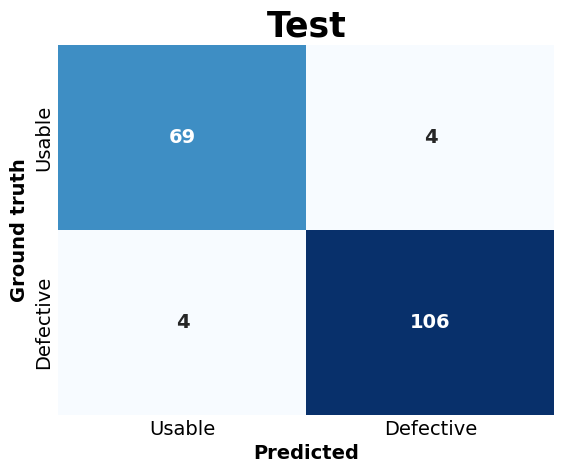

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9727272727272728, 'qt_Test_acc': 0.9562841530054644, 'qt_Test_precision': 0.9553571428571429}
Confusion matrix Test 
 [[ 68   5]
 [  3 107]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (453).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (472).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (483).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


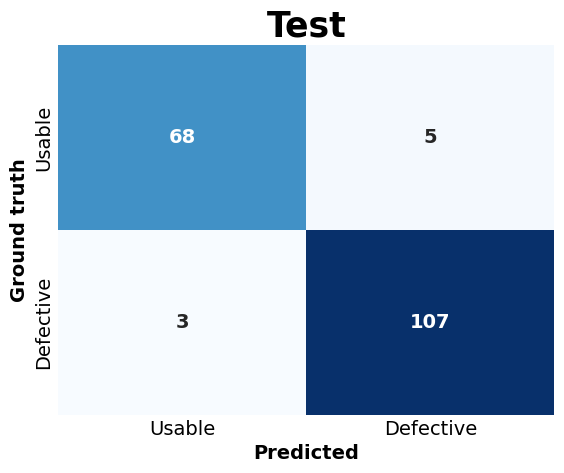

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()